<a href="https://colab.research.google.com/github/Soumo31428/DecisionTreeClassifier/blob/main/Decision_Tree_Classifier_Practical_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [3]:
## Independent Feature
x = pd.DataFrame(iris['data'], columns=['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm'])

## Dependent feature
y = iris['target']

x.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
## train test split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.25, random_state = 10)

In [7]:
## Apply Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()
model1.fit(xtrain, ytrain)

DecisionTreeClassifier()

[Text(0.5, 0.9, 'x[2] <= 2.45\ngini = 0.666\nsamples = 112\nvalue = [39, 35, 38]'),
 Text(0.4230769230769231, 0.7, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.46153846153846156, 0.8, 'True  '),
 Text(0.5769230769230769, 0.7, 'x[3] <= 1.75\ngini = 0.499\nsamples = 73\nvalue = [0, 35, 38]'),
 Text(0.5384615384615384, 0.8, '  False'),
 Text(0.3076923076923077, 0.5, 'x[2] <= 4.95\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.15384615384615385, 0.3, 'x[3] <= 1.65\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(0.07692307692307693, 0.1, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.23076923076923078, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.3, 'x[3] <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.38461538461538464, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.8461538461538461, 0.5, 'x[2] <= 4.85\ngin

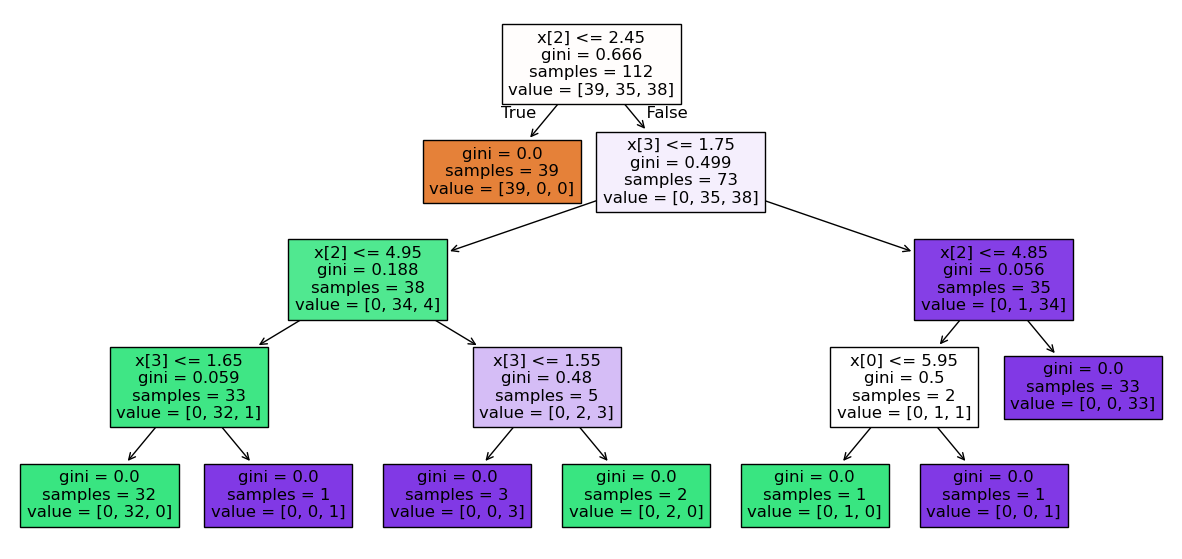

In [9]:
## Visulaize the Decision Tree
from sklearn import tree
plt.figure(figsize=(15,7))
tree.plot_tree(model1, filled = True)

In [11]:
y_pred1 = model1.predict(xtest)

In [13]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(accuracy_score(ytest, y_pred1))
print(confusion_matrix(ytest, y_pred1))
print(classification_report(ytest,y_pred1))

0.9736842105263158
[[11  0  0]
 [ 0 15  0]
 [ 0  1 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.94      1.00      0.97        15
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [14]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(max_depth = 2)
model2.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=2)

In [16]:
y_pred2 = model1.predict(xtest)

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(accuracy_score(ytest, y_pred2))
print(confusion_matrix(ytest, y_pred2))
print(classification_report(ytest,y_pred2))

0.9736842105263158
[[11  0  0]
 [ 0 15  0]
 [ 0  1 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.94      1.00      0.97        15
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



## Decision Tree Classifier Prepruning & Hyperpaprameter Tuning

In [19]:
param = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2'],
}

In [22]:
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier()
grid = GridSearchCV(dtc, param, cv = 5)

In [23]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [24]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [25]:
grid.best_score_

0.9470355731225297

In [26]:
pred = grid.predict(xtest)

In [27]:
print(accuracy_score(ytest, pred))
print(confusion_matrix(ytest, pred))
print(classification_report(ytest,pred))

0.9473684210526315
[[11  0  0]
 [ 0 13  2]
 [ 0  0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.87      0.93        15
           2       0.86      1.00      0.92        12

    accuracy                           0.95        38
   macro avg       0.95      0.96      0.95        38
weighted avg       0.95      0.95      0.95        38

